# Creating and evaluating a random forest model for Ames Dataset

In [1]:
#importing required modules and packages
#Pandas is an open-source Python Library providing high-performance data manipulation and analysis tool using its powerful data structures.
import pandas as pd

#NumPy is a Python library used for working with the arrays.
#It also has functions for working in domain of linear algebra and matrices.
import numpy as np

#matplotlib.pyplot is a collection of functions that make matplotlib work just like MATLAB
import matplotlib.pyplot as plt

#The sklearn library contains a lot of the efficient tools for machine learning and statistical modeling
#including classification, regression, clustering and dimensionality reduction.
from sklearn.ensemble import RandomForestRegressor

In [2]:
#reading the data from house_data csv file and assigning that to a variable called house_data and adding 1 to index so the index will start from 1 instead of 0.
house_data = pd.read_csv ('D:\St Clair\Semester 2\DAB200 Machine learning 1\Lab\Lab 1\house_data.csv')
house_data.index = house_data.index+1

In [3]:
#head of the data gives us some info by looking at the first 5 rows.
house_data.head()

,bedrooms,bathrooms,m2_living,floors,m2_above,m2_basement,m2_lot,view,quality,yr_built,renovated_last_5,city,statezip,price
1,3,1.50,124.0,1.5,124.0,0.0,735.0,0,3,1961,0,37,63,313000.0
2,5,2.50,339.0,2.0,313.0,26.0,841.0,4,5,1927,1,36,59,2384000.0
3,3,2.00,179.0,1.0,179.0,0.0,1110.0,0,4,1972,1,19,27,342000.0
4,3,2.25,186.0,1.0,93.0,93.0,746.0,0,4,1969,1,4,8,420000.0
5,4,2.50,180.0,1.0,106.0,74.0,975.0,0,4,1982,0,32,32,550000.0


In [4]:
#we can see that all the data in the columns are of numeric type ie.integers and float types.
house_data.dtypes

bedrooms              int64
bathrooms           float64
m2_living           float64
floors              float64
m2_above            float64
m2_basement         float64
m2_lot              float64
view                  int64
quality               int64
yr_built              int64
renovated_last_5      int64
city                  int64
statezip              int64
price               float64
dtype: object

In [5]:
#isna() is used to check if there are any missing values and 0 indicates there are no missing values in the variables.
house_data.isnull().sum()

bedrooms            0
bathrooms           0
m2_living           0
floors              0
m2_above            0
m2_basement         0
m2_lot              0
view                0
quality             0
yr_built            0
renovated_last_5    0
city                0
statezip            0
price               0
dtype: int64

In [6]:
#The train_test_split function is for splitting a single dataset for two different purposes: training and testing.
from sklearn.model_selection import train_test_split

#Here X is the set of features and also known as independent variables.
X = house_data[['bathrooms','bedrooms','m2_living', 'floors', 'm2_above', 'm2_basement', 'm2_lot', 'view', 'quality', 'yr_built', 'renovated_last_5', 'city', 'statezip']]

#The target variable of a dataset is the feature of a dataset about which you want to gain a deeper understanding.
#Here price is the target variable which we want to predict.
y = house_data['price']

#The test_size=0.2 inside the function indicates the percentage of the data that should be held over for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [7]:
X.head()

,bathrooms,bedrooms,m2_living,floors,m2_above,m2_basement,m2_lot,view,quality,yr_built,renovated_last_5,city,statezip
1,1.50,3,124.0,1.5,124.0,0.0,735.0,0,3,1961,0,37,63
2,2.50,5,339.0,2.0,313.0,26.0,841.0,4,5,1927,1,36,59
3,2.00,3,179.0,1.0,179.0,0.0,1110.0,0,4,1972,1,19,27
4,2.25,3,186.0,1.0,93.0,93.0,746.0,0,4,1969,1,4,8
5,2.50,4,180.0,1.0,106.0,74.0,975.0,0,4,1982,0,32,32


In [8]:
y.head()

1     313000.0
2    2384000.0
3     342000.0
4     420000.0
5     550000.0
Name: price, dtype: float64

In [9]:
#Random forest regression is supervised learning algorithm that uses ensemble learning method of regression.
#Ensemble learning is a technique that combines predictions from multiple algorithms to make more
#accurate predictions than a single model.

from sklearn.ensemble import RandomForestRegressor

#The mean absolute error of a model with respect to a test_set is the mean of absolute values of the individual
#prediction errors on over all instances in the test_set.
from sklearn.metrics import mean_absolute_error

#n_estimators is the number of trees in the forest and we have kept that default which is 100.

rf = RandomForestRegressor() 

#fit is used to fit the model on the training data.
rf.fit(X_train, y_train)

RandomForestRegressor()

In [10]:
#To actually make a prediction, we call predict() on training dataset.
#MAE measures the average magnitude of the errors in a set of predictions without considering their direction.
#Finding MAE and percentage of error on the train set of data to know the average of the errors in the predictions.

predictions = rf.predict(X_train)

e_train = mean_absolute_error(y_train, predictions)

ep_train = e_train*100 / y.mean()

print(f"${e_train:.0f} average error; {ep_train:.2f}% error")

$53370 average error; 9.67% error


In [11]:
#using fit on testing dataset.
rf.fit(X_test, y_test)

RandomForestRegressor()

In [12]:
#Finding MAE and percentage of error on the validation set.
predictions = rf.predict(X_test)

e_test = mean_absolute_error(y_test, predictions)

ep_test = e_test*100 / y.mean()

print(f"${e_test:.0f} average error; {ep_test:.2f}% error")

$52339 average error; 9.48% error


## Part 2 - Exploring the `n_estimators` hyper-parameter


In [13]:
#using the for loop with n_estimator(number of trees) for values from 1 to 30 on the random forest model.
#assigning a variable to frame to insert the values in later stage.

frame_train = []
frame_validate=[]

#for loop to repeat the code below with the values of x from 1 to 30 including 30 and excluding 31

for x in range(1,31):
    #creating random forest model with x as the number of the trees in forest to make more predictions.
    rf2 = RandomForestRegressor(n_estimators=x)
    #fitting the random forest regressor model with the train set of data.
    rf2.fit(X_train, y_train)
    predictions = rf2.predict(X_train)
    #finding the mean absolute error ie. mean of absolute values of individual prediction errors on training dataset.
    e_train = mean_absolute_error(y_train, predictions)
    #assigning the result we got to the variable called t.
    t=e_train*100.0/y.mean()
    print(f"Training data set: n_estimator = {x}; ${e_train:.0f} average error")
    
    
    rf2 = RandomForestRegressor(n_estimators=x)
    rf2.fit(X_test, y_test)
    predictions_test = rf2.predict(X_test)
    #finding the mean absolute error ie. mean of absolute values of individual prediction errors.
    e_test = mean_absolute_error(y_test, predictions_test)
    #assigning the result we got to the variable called v.
    v=e_test*100.0/y.mean()
    print(f"Test data set: n_estimator = {x}; ${e_test:.0f} average error")
    
    #inserting the results of validation and train mean absolute errors into the different variables.
    frame_validate.insert(x,[e_test,  x, v])
    frame_train.insert(x,[e_train, x, t])    
    #assiginig to a dataframe
frame_validate = pd.DataFrame(frame_validate, columns= ["Mean_absolute_error","n_estimators_value", "error%"])
frame_train = pd.DataFrame(frame_train, columns= ["Mean_absolute_error","n_estimators_value", "error%"])    

Training data set: n_estimator = 1; $66921 average error
Test data set: n_estimator = 1; $59543 average error
Training data set: n_estimator = 2; $74231 average error
Test data set: n_estimator = 2; $72383 average error
Training data set: n_estimator = 3; $64249 average error
Test data set: n_estimator = 3; $67336 average error
Training data set: n_estimator = 4; $64509 average error
Test data set: n_estimator = 4; $71389 average error
Training data set: n_estimator = 5; $60158 average error
Test data set: n_estimator = 5; $65297 average error
Training data set: n_estimator = 6; $60260 average error
Test data set: n_estimator = 6; $71250 average error
Training data set: n_estimator = 7; $66223 average error
Test data set: n_estimator = 7; $62014 average error
Training data set: n_estimator = 8; $59577 average error
Test data set: n_estimator = 8; $61415 average error
Training data set: n_estimator = 9; $59578 average error
Test data set: n_estimator = 9; $58548 average error
Training d

In [14]:
#display the dataframe with the column names and values that we assigned above.
frame_validate

,Mean_absolute_error,n_estimators_value,error%
0,59543.222749,1,10.787539
1,72382.767605,2,13.113699
2,67336.253780,3,12.199415
3,71388.791433,4,12.933619
4,65297.436636,5,11.830039
5,71249.684986,6,12.908417
6,62014.332850,7,11.235234
7,61415.052639,8,11.126661
8,58547.670188,9,10.607173
9,60175.633250,10,10.902114


In [15]:
min(frame_validate['Mean_absolute_error']),min(frame_validate['error%'])
# at n_estimator = 30

(52561.11304751165, 9.522579257155858)

In [16]:
#display the dataframe with the column names and values that we assigned above.
frame_train

,Mean_absolute_error,n_estimators_value,error%
0,66921.270668,1,12.124232
1,74230.583085,2,13.448471
2,64248.623810,3,11.640024
3,64508.589204,4,11.687122
4,60158.283789,5,10.898971
5,60260.074757,6,10.917412
6,66222.782598,7,11.997685
7,59576.743127,8,10.793612
8,59577.857589,9,10.793814
9,58836.419663,10,10.659486


In [17]:
min(frame_train['Mean_absolute_error']),min(frame_train['error%'])
# at n_estimator = 26

(53494.27543216546, 9.691641749413774)

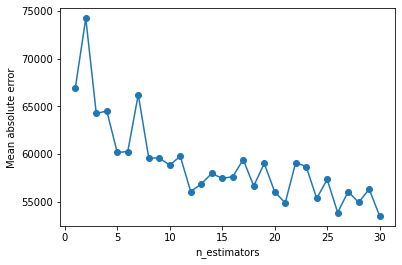

In [18]:
#plot the data in the dataframe in the form of map with the use of matplotlib.pyplot imported above as plt.
plt.plot(frame_train.n_estimators_value, frame_train.Mean_absolute_error, marker="o")
#label to put text on x axis.
plt.xlabel("n_estimators")
#label to put text on the y axis.
plt.ylabel("Mean absolute error")
#plt.show() starts a loop, looks for all currently active figure objects, 
#and opens one or more interactive windows that display figures.
plt.show()

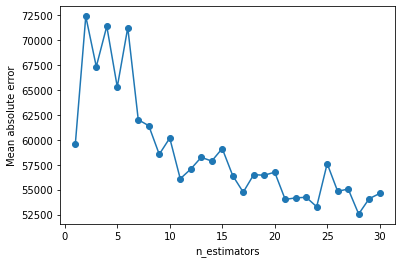

In [19]:
#plot the data in the dataframe in the form of map with the use of matplotlib.pyplot imported above as plt.
plt.plot(frame_validate.n_estimators_value, frame_validate.Mean_absolute_error, marker="o")
#label to put text on x axis.
plt.xlabel("n_estimators")
#label to put text on the y axis.
plt.ylabel("Mean absolute error")
#plt.show() starts an event loop, looks for all currently active figure objects, 
#and opens one or more interactive windows that display figures.
plt.show()

* n_estimator value of 30 gives the best result in validation and value of 26 gives best result in training set..
* The curve is not smooth because different values of trees used as n_estimators gave different values of mean absolute errors. The reason for selecting above mentioned values are beacause of minimum mean absolute error for those particular values.
* The minimum error percentage is similar to error percentage in part 1.

## Part 3 - Exploring the `max_features` hyper-parameter

In [20]:
frame1_train = []
frame1_validate=[]
#for loop to repeat the code below with the values of i from 1 to 13 including 13 and excluding 14
for n in range(1,14):

    ##creating random forest model with m as the max features
    #(max features to consider for split) to make more predictions.
    rf3 = RandomForestRegressor(max_features=n)
    #fitting the random forest regressor model with the train set of data.
    rf3.fit(X_train, y_train)
    predictions_tr = rf3.predict(X_train)
    
    train1_e = mean_absolute_error(y_train, predictions_tr)
    #assigning the result we got to the variable called tr.
    tr=train1_e*100.0/y.mean()
    
    print(f"Training data set: max_features = {n}; ${tr:.2f} average error")
    
    rf3 = RandomForestRegressor(max_features=n)
    rf3.fit(X_test, y_test)
    predictions_te = rf3.predict(X_test)
    
    validation1_e = mean_absolute_error(y_test, predictions_te)
    va=validation1_e*100.0/y.mean()
    print(f"Test data set: max_features = {n}; ${tr:.2f} average error")
    
    frame1_validate.insert(n,[validation1_e,  n, va])
    frame1_train.insert(n,[train1_e, n, tr])
frame1_validate = pd.DataFrame(frame1_validate, columns= ["Mean_absolute_error","max_features_value", "error%"])
frame1_train = pd.DataFrame(frame1_train, columns= ["Mean_absolute_error","max_features_value", "error%"])

Training data set: max_features = 1; $10.40 average error
Test data set: max_features = 1; $10.40 average error
Training data set: max_features = 2; $10.35 average error
Test data set: max_features = 2; $10.35 average error
Training data set: max_features = 3; $9.82 average error
Test data set: max_features = 3; $9.82 average error
Training data set: max_features = 4; $9.83 average error
Test data set: max_features = 4; $9.83 average error
Training data set: max_features = 5; $9.79 average error
Test data set: max_features = 5; $9.79 average error
Training data set: max_features = 6; $9.70 average error
Test data set: max_features = 6; $9.70 average error
Training data set: max_features = 7; $9.91 average error
Test data set: max_features = 7; $9.91 average error
Training data set: max_features = 8; $9.56 average error
Test data set: max_features = 8; $9.56 average error
Training data set: max_features = 9; $9.71 average error
Test data set: max_features = 9; $9.71 average error
Traini

In [21]:
#display the dataframe with the column names and values that we assigned above.
frame1_validate

,Mean_absolute_error,max_features_value,error%
0,54962.363172,1,9.957618
1,53725.505551,2,9.733534
2,52262.604493,3,9.468498
3,52474.984271,4,9.506975
4,51926.090953,5,9.407531
5,52972.246222,6,9.597065
6,52444.071249,7,9.501375
7,52480.254792,8,9.507930
8,52156.770603,9,9.449324
9,52274.128928,10,9.470586


In [22]:
min(frame1_validate['Mean_absolute_error']),min(frame1_validate['error%'])
# at n_estimator = 8

(51926.090953258696, 9.407531308740024)

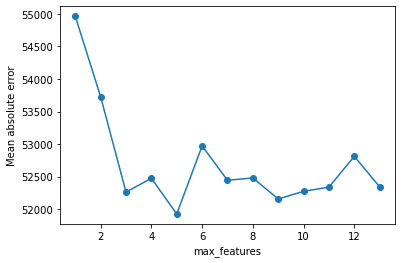

In [23]:
#plot the data in the dataframe in the form of map with the use of matplotlib.pyplot imported above as plt.
plt.plot(frame1_validate.max_features_value, frame1_validate.Mean_absolute_error, marker="o")
#label to put text on x axis.
plt.xlabel("max_features")
#label to put text on y axis.
plt.ylabel("Mean absolute error")
#plt.show() starts an event loop, looks for all currently active figure objects, 
#and opens one or more interactive windows that display figures.
plt.show()

In [24]:
#display the dataframe with the column names and values that we assigned above.
frame1_train

,Mean_absolute_error,max_features_value,error%
0,57395.170436,1,10.398373
1,57144.958902,2,10.353042
2,54214.823514,3,9.822185
3,54250.734363,4,9.828691
4,54029.889531,5,9.788680
5,53562.060925,6,9.703923
6,54681.505520,7,9.906734
7,52748.102141,8,9.556456
8,53609.761262,9,9.712564
9,52986.856624,10,9.599712


In [25]:
min(frame1_train['Mean_absolute_error']),min(frame1_train['error%'])
# at n_estimator = 13

(52002.800748109934, 9.421428942540334)

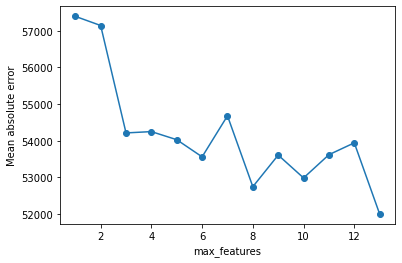

In [26]:
#plot the data in the dataframe in the form of map with the use of matplotlib.pyplot imported above as plt.
plt.plot(frame1_train.max_features_value, frame1_train.Mean_absolute_error, marker="o")
#label to put text on x axis.
plt.xlabel("max_features")
#label to put text on y axis.
plt.ylabel("Mean absolute error")
#plt.show() starts an event loop, looks for all currently active figure objects, 
#and opens one or more interactive windows that display figures.
plt.show()

* max_features value of 8 gives the best result in validation and value of 13 gives best result in training set.
* The reason for selecting max_feature as 8 is because the mean absolute error for it is least as compared to all the other values.
* The error percent is less from part2 by 0.2-0.4% compared to that of part3.